In [36]:
!pip install pymongo

In [111]:
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint

In [38]:
conn_str="mongodb://localhost:27017"
client= pymongo.MongoClient(conn_str, serverSelectionTimeoutMS=5000)

try:
    pprint(client.server_info())
except Exception:
    print("No conectado")

{'allocator': 'tcmalloc',
 'bits': 64,
 'buildEnvironment': {'cc': 'cl: Microsoft (R) C/C++ Optimizing Compiler '
                            'Version 19.31.31107 for x64',
                      'ccflags': '/nologo /WX /FImongo/platform/basic.h '
                                 '/fp:strict /EHsc /W3 /wd4068 /wd4244 /wd4267 '
                                 '/wd4290 /wd4351 /wd4355 /wd4373 /wd4800 '
                                 '/wd4251 /wd4291 /we4013 /we4099 /we4930 '
                                 '/errorReport:none /MD /O2 /Oy- /bigobj '
                                 '/utf-8 /permissive- /Zc:__cplusplus '
                                 '/Zc:sizedDealloc /volatile:iso '
                                 '/diagnostics:caret /std:c++17 /Gw /Gy '
                                 '/Zc:inline',
                      'cppdefines': 'SAFEINT_USE_INTRINSICS 0 PCRE_STATIC '
                                    'NDEBUG BOOST_ALL_NO_LIB _UNICODE UNICODE '
                             

In [39]:
db=client["as2"]
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, serverselectiontimeoutms=5000), 'as2')

In [40]:
clics=db["clics"]
pprint(clics.find())

In [57]:
tweets=db["Tweets"]
pprint(clics.find())

In [42]:
pd.DataFrame(clics.find({},{}))

,_id,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,6386959bed858f27625a9743,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,IN,0.0,Asia/Calcutta,38,15r91,10OBm3W,pontifier,"en-US,en;q=0.8",j.mp,direct,http://www.nsa.gov/,1.368775e+09,1.365701e+09,Jamshedpur,"[22.799999, 86.183296]",NaN,NaN
1,6386959bed858f27625a9744,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,UcYpGN,SkcRGU,o_33avl0ri1b,en-US,1.usa.gov,http://fwp.mt.gov/,http://fwp.mt.gov/myfwp/,1.368775e+09,1.352829e+09,Washington,"[38.893299, -77.014603]",NaN,NaN
2,6386959bed858f27625a9745,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,US,0.0,America/Los_Angeles,CA,1084Psg,19Cztuz,tweetdeckapi,en-us,1.usa.gov,http://t.co/btKvKFBaF5,http://science.nasa.gov/science-news/science-a...,1.368775e+09,1.368774e+09,Palm Desert,"[33.7724, -116.345802]",NaN,NaN
3,6386959bed858f27625a9746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.368775e+09,NaN
4,6386959bed858f27625a9747,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,NL,0.0,Europe/Amsterdam,06,15r91,10OBm3W,pontifier,en-GB,j.mp,direct,http://www.nsa.gov/,1.368775e+09,1.365701e+09,Oss,"[51.766701, 5.5333]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,6386959bed858f27625aa33b,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,VA,crH3Wg,RhoA8W,fhah03269,NaN,bit.ly,direct,http://portal.hud.gov/portal/page/portal/HUD/p...,1.368778e+09,1.350056e+09,Richmond,"[37.5522, -77.458199]",NaN,HUDcontracts
3065,6386959bed858f27625aa33c,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,VA,4rM5DX,RmBAxx,fhah03269,NaN,bit.ly,direct,http://portal.hud.gov/portal/page/portal/HUD/p...,1.368778e+09,1.350057e+09,Richmond,"[37.5522, -77.458199]",NaN,HUDfunding
3066,6386959bed858f27625aa33d,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/Chicago,OK,UcYpGN,SkcRGU,o_33avl0ri1b,en-us,1.usa.gov,http://fwp.mt.gov/,http://fwp.mt.gov/myfwp/,1.368778e+09,1.352829e+09,Bartlesville,"[36.747299, -95.980797]",NaN,NaN
3067,6386959bed858f27625aa33e,Opera/9.80 (Windows NT 6.1; WOW64) Presto/2.12...,None,0.0,,NaN,15r91,10OBm3W,pontifier,"en-ZA,en;q=0.9",j.mp,direct,http://www.nsa.gov/,1.368778e+09,1.365701e+09,NaN,NaN,NaN,NaN


Contar los usuarios de Opera y Mozilla utilizando el campo "a"
Crear una serie a partir de los resultados

In [43]:
pd.DataFrame(clics.aggregate([
    {
        "$match":{
            "$or":[{"a": {"$regex":"Opera"}}, {"a":{"$regex":"Mozilla"}}]
        }
    },
    {"$count":"a"}
]))

,a
0,2830


In [44]:
dfOpMoz = pd.DataFrame(clics.aggregate([
    {
        "$match":{
            "$or":[{"a": {"$regex":"Opera"}}, {"a":{"$regex":"Mozilla"}}]
        }
    }
]))

In [45]:
serieOM = pd.Series(dfOpMoz['a'].values)
serieOM

0       Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...
1       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
2       Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...
3       Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
4       Opera/9.80 (VRE; Opera Mini/4.2/29.3594; U; en...
                              ...                        
2825    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
2826    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
2827    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
2828    Opera/9.80 (Windows NT 6.1; WOW64) Presto/2.12...
2829    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Length: 2830, dtype: object

Encontrar cuantos usuarios hablan inglés.

In [46]:
df_en= pd.DataFrame(clics.find({"al":{"$regex":"en"}}, {"_id":0}))

In [47]:
df_en.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,kw
0,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,IN,0,Asia/Calcutta,38,15r91,10OBm3W,pontifier,"en-US,en;q=0.8",j.mp,direct,http://www.nsa.gov/,1368774597,1365701422,Jamshedpur,"[22.799999, 86.183296]",NaN
1,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1,America/New_York,DC,UcYpGN,SkcRGU,o_33avl0ri1b,en-US,1.usa.gov,http://fwp.mt.gov/,http://fwp.mt.gov/myfwp/,1368774600,1352828850,Washington,"[38.893299, -77.014603]",NaN
2,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,US,0,America/Los_Angeles,CA,1084Psg,19Cztuz,tweetdeckapi,en-us,1.usa.gov,http://t.co/btKvKFBaF5,http://science.nasa.gov/science-news/science-a...,1368774599,1368774179,Palm Desert,"[33.7724, -116.345802]",NaN
3,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,NL,0,Europe/Amsterdam,06,15r91,10OBm3W,pontifier,en-GB,j.mp,direct,http://www.nsa.gov/,1368774599,1365701422,Oss,"[51.766701, 5.5333]",NaN
4,Opera/9.80 (VRE; Opera Mini/4.2/29.3594; U; en...,None,0,,NaN,10wNFQH,10wNFQG,medlineplus4you,en,1.usa.gov,http://t.co/pUx3YOu5Jk,http://www.nlm.nih.gov/medlineplus/news/fullst...,1368774602,1368560441,NaN,NaN,NaN


In [48]:
df_en.shape[0]

1278

Encontrar cuántos usuarios son de Seoul.

In [49]:
df_se= pd.DataFrame(clics.find({"cy":{"$regex":"Seoul"}}, {"_id":0}))
df_se.shape[0]

6

Seleccionar las columnas “_id”, “a”, y “cy” de clics

In [50]:
df1 = pd.DataFrame(clics.find({},{}))
df1.head()

,_id,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,6386959bed858f27625a9743,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,IN,0.0,Asia/Calcutta,38,15r91,10OBm3W,pontifier,"en-US,en;q=0.8",j.mp,direct,http://www.nsa.gov/,1.368775e+09,1.365701e+09,Jamshedpur,"[22.799999, 86.183296]",NaN,NaN
1,6386959bed858f27625a9744,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,UcYpGN,SkcRGU,o_33avl0ri1b,en-US,1.usa.gov,http://fwp.mt.gov/,http://fwp.mt.gov/myfwp/,1.368775e+09,1.352829e+09,Washington,"[38.893299, -77.014603]",NaN,NaN
2,6386959bed858f27625a9745,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,US,0.0,America/Los_Angeles,CA,1084Psg,19Cztuz,tweetdeckapi,en-us,1.usa.gov,http://t.co/btKvKFBaF5,http://science.nasa.gov/science-news/science-a...,1.368775e+09,1.368774e+09,Palm Desert,"[33.7724, -116.345802]",NaN,NaN
3,6386959bed858f27625a9746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.368775e+09,NaN
4,6386959bed858f27625a9747,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,NL,0.0,Europe/Amsterdam,06,15r91,10OBm3W,pontifier,en-GB,j.mp,direct,http://www.nsa.gov/,1.368775e+09,1.365701e+09,Oss,"[51.766701, 5.5333]",NaN,NaN


In [51]:
df2 = df1[['_id','a','cy']]

Ordenar por cy en orden descendente

In [52]:
df2.sort_values(by='cy', ascending=False)

,_id,a,cy
2278,6386959bed858f27625aa029,Mozilla/5.0 (Windows NT 5.1; rv:11.0) Gecko/20...,Zuzemberk
2172,6386959bed858f27625a9fbf,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,Zoetermeer
984,6386959bed858f27625a9b1b,GoogleProducer; (+http://goo.gl/7y4SX),Zaventem
2349,6386959bed858f27625aa070,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,Zarinsk
2888,6386959bed858f27625aa28b,Mozilla/5.0 (Linux; U; Android 4.1.2; es-es; G...,Zaragoza
...,...,...,...
3052,6386959bed858f27625aa32f,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,NaN
3054,6386959bed858f27625aa331,Opera/9.80 (Series 60; Opera Mini/7.1.32444/29...,NaN
3063,6386959bed858f27625aa33a,Mozilla/5.0 (MeeGo; NokiaN9) AppleWebKit/534.1...,NaN
3067,6386959bed858f27625aa33e,Opera/9.80 (Windows NT 6.1; WOW64) Presto/2.12...,NaN


Obtener sólo 3 filas

In [53]:
df2.iloc[[0,1,2]]

,_id,a,cy
0,6386959bed858f27625a9743,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,Jamshedpur
1,6386959bed858f27625a9744,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Washington
2,6386959bed858f27625a9745,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,Palm Desert


Omitir la primera

In [54]:
df2.iloc[[1,2,3]]

,_id,a,cy
1,6386959bed858f27625a9744,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Washington
2,6386959bed858f27625a9745,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,Palm Desert
3,6386959bed858f27625a9746,NaN,NaN


Crear una serie con todos los valores únicos de “a”.

In [55]:
serieA = pd.Series(df1['a'].unique())
serieA

0      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...
1      Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
2      Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...
3                                                    NaN
4      Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
                             ...                        
555    Mozilla/5.0 (Windows; U; Windows NT 5.1; ru; r...
556    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2)...
557    Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_2 like ...
558    Mozilla/5.0 (MeeGo; NokiaN9) AppleWebKit/534.1...
559    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Length: 560, dtype: object

## Tweets

¿Cuántas filas contiene la collección?
122

In [60]:
df_tweets = pd.DataFrame(tweets.find({},{}))
df_tweets.head()

,_id,contributors,truncated,text,in_reply_to_status_id,id,favorite_count,source,retweeted,coordinates,...,user,geo,in_reply_to_user_id_str,lang,created_at,filter_level,in_reply_to_status_id_str,place,possibly_sensitive,retweeted_status
0,638695beed858f27625aa344,None,False,"Pte. Roca entre 9 de Julio y 3 de Febrero, trá...",NaN,423879511961522200,0,"<a href=""http://twitter.com/download/android"" ...",False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:08:45 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN,NaN
1,638695beed858f27625aa345,None,False,I was going to instagram this beautiful shot o...,NaN,423879523248381950,0,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:48 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",False,NaN
2,638695beed858f27625aa346,None,False,soy latte is like ariana's energy drink,NaN,423879525441601540,0,web,False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:48 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN,NaN
3,638695beed858f27625aa347,None,False,First latte in a long long time... #withdrawls...,NaN,423879526847107100,0,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:49 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",False,NaN
4,638695beed858f27625aa348,None,False,RT @PimpBillClinton: Just told this foxy Starb...,NaN,423879532689383400,0,web,False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:50 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN,"{'contributors': None, 'truncated': False, 'te..."


Enumerar los screen_names de los usuarios que han tuiteado más de una vez.

In [68]:
df_tweets["user"]=df_tweets["user"].values.astype('str')
df_tweets.head()

,_id,contributors,truncated,text,in_reply_to_status_id,id,favorite_count,source,retweeted,coordinates,...,user,geo,in_reply_to_user_id_str,lang,created_at,filter_level,in_reply_to_status_id_str,place,possibly_sensitive,retweeted_status
0,638695beed858f27625aa344,None,False,"Pte. Roca entre 9 de Julio y 3 de Febrero, trá...",NaN,423879511961522200,0,"<a href=""http://twitter.com/download/android"" ...",False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:08:45 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN,NaN
1,638695beed858f27625aa345,None,False,I was going to instagram this beautiful shot o...,NaN,423879523248381950,0,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:48 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",False,NaN
2,638695beed858f27625aa346,None,False,soy latte is like ariana's energy drink,NaN,423879525441601540,0,web,False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:48 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN,NaN
3,638695beed858f27625aa347,None,False,First latte in a long long time... #withdrawls...,NaN,423879526847107100,0,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:49 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",False,NaN
4,638695beed858f27625aa348,None,False,RT @PimpBillClinton: Just told this foxy Starb...,NaN,423879532689383400,0,web,False,None,...,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:50 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN,"{'contributors': None, 'truncated': False, 'te..."


In [69]:
User2 = df_tweets["user"].str.split(",", expand = True)
User2

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,{'follow_request_sent': None,'profile_use_background_image': False,'default_profile_image': False,'id': 1258173870,'verified': False,'profile_image_url_https': 'https://pbs.twimg...,'profile_sidebar_fill_color': 'DDEEF6','profile_text_color': '333333','followers_count': 3803,'profile_sidebar_border_color': 'FFFFFF',...,'created_at': 'Sun Mar 10 23:38:41 +0000 2013','contributors_enabled': False,'time_zone': 'Buenos Aires','protected': False,'default_profile': False,'is_translator': False},None,None,None,None
1,{'follow_request_sent': None,'profile_use_background_image': True,'default_profile_image': False,'id': 935621131,'verified': False,'profile_image_url_https': 'https://pbs.twimg...,'profile_sidebar_fill_color': 'DDEEF6','profile_text_color': '333333','followers_count': 84,'profile_sidebar_border_color': '000000',...,'screen_name': 'BaristaBatgirl','notifications': None,'url': None,'created_at': 'Thu Nov 08 22:47:03 +0000 2012','contributors_enabled': False,'time_zone': None,'protected': False,'default_profile': False,'is_translator': False},None
2,{'follow_request_sent': None,'profile_use_background_image': True,'default_profile_image': False,'id': 317661817,'verified': False,'profile_image_url_https': 'https://pbs.twimg...,'profile_sidebar_fill_color': 'DDEEF6','profile_text_color': '752675','followers_count': 29382,'profile_sidebar_border_color': 'FFFFFF',...,'time_zone': 'Kuala Lumpur','protected': False,'default_profile': False,'is_translator': False},None,None,None,None,None,None
3,{'follow_request_sent': None,'profile_use_background_image': True,'default_profile_image': False,'id': 190092351,'verified': False,'profile_image_url_https': 'https://pbs.twimg...,'profile_sidebar_fill_color': 'F6F6F6','profile_text_color': '333333','followers_count': 201,'profile_sidebar_border_color': 'FFFFFF',...,'time_zone': 'Central Time (US & Canada)','protected': False,'default_profile': False,'is_translator': False},None,None,None,None,None,None
4,{'follow_request_sent': None,'profile_use_background_image': True,'default_profile_image': False,'id': 27814516,'verified': False,'profile_image_url_https': 'https://pbs.twimg...,'profile_sidebar_fill_color': 'A0C5C7','profile_text_color': '333333','followers_count': 113,'profile_sidebar_border_color': 'FFFFFF',...,'created_at': 'Tue Mar 31 04:35:09 +0000 2009','contributors_enabled': False,'time_zone': 'Eastern Time (US & Canada)','protected': False,'default_profile': False,'is_translator': False},None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,{'follow_request_sent': None,'profile_use_background_image': True,'default_profile_image': False,'id': 1475963845,'verified': False,'profile_image_url_https': 'https://pbs.twimg...,'profile_sidebar_fill_color': '252429','profile_text_color': '666666','followers_count': 1627,'profile_sidebar_border_color': 'FFFFFF',...,'contributors_enabled': False,'time_zone': 'Brasilia','protected': False,'default_profile': False,'is_translator': False},None,None,None,None,None
118,{'follow_request_sent': None,'profile_use_background_image': True,'default_profile_image': False,'id': 174006686,'verified': False,'profile_image_url_https': 'https://pbs.twimg...,'profile_sidebar_fill_color': 'DDEEF6','profile_text_color': '333333','followers_count': 1009,'profile_sidebar_border_color': 'C0DEED',...,'default_profile': True,'is_translator': False},None,None,None,None,None,None,None,None
119,{'follow_request_sent': None,'profile_use_background_image': False,'default_profile_image': False,'id': 432220738,'verified': False,'profile_image_url_https': 'https://pbs.twimg...,'profile_sidebar_fill_color': '9E9E9E','profile_text_color': '404040','followers_count': 241,'profile_sidebar_border_color': 'E6AACE',...,'time_zone': 'Alaska','protected': False,'default_profile': False,'is_translator': False},None,None,None,None,None,None
120,{'follow_request_sent': N

In [70]:
df_tweets["userID"]= User2[3]

In [75]:
dfusertweet= pd.DataFrame(df_tweets['userID'].value_counts())
dfusertweet

,userID
'id': 2171219068,2
'id': 317661817,2
'id': 1635178106,1
'id': 2267946770,1
'id': 1089746396,1
...,...
'id': 960666673,1
'id': 214627932,1
'id': 870162504,1
'id': 267050600,1


In [76]:
dfusertweet.loc[dfusertweet['userID'] > 1]

,userID
'id': 2171219068,2
'id': 317661817,2


¿Cuántos tweets son sobre Starbucks?

In [88]:
dfstarbucks= pd.DataFrame(tweets.find({"text":{"$regex":"Starbucks"}}, {"_id":0}))
dfstarbucks

,contributors,truncated,text,in_reply_to_status_id,id,favorite_count,source,retweeted,coordinates,entities,...,retweeted_status,user,geo,in_reply_to_user_id_str,lang,created_at,filter_level,in_reply_to_status_id_str,place,possibly_sensitive
0,None,False,RT @PimpBillClinton: Just told this foxy Starb...,None,423879532689383400,0,web,False,None,"{'symbols': [], 'user_mentions': [{'id': 91441...",...,"{'contributors': None, 'truncated': False, 'te...","{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:50 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
1,None,False,"RT @AyeeeBRENdZ: I got a Starbucks at my job, ...",None,423879533415399400,0,"<a href=""http://twitter.com/download/iphone"" r...",False,None,"{'symbols': [], 'user_mentions': [{'id': 13236...",...,"{'contributors': None, 'truncated': False, 'te...","{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:08:50 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
2,None,False,Photo: My name spelled the French way! 🇫🇷 #bon...,None,423879730304413700,0,"<a href=""http://www.tumblr.com/"" rel=""nofollow...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,NaN,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:09:37 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",False
3,None,False,RT @PimpBillClinton: Just told this foxy Starb...,None,423879750898040800,0,"<a href=""http://twitter.com/download/iphone"" r...",False,None,"{'symbols': [], 'user_mentions': [{'id': 91441...",...,"{'contributors': None, 'truncated': False, 'te...","{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:09:42 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
4,None,False,RT @HonestStarbucks: The Elitist Clown Latte,None,423879888970321900,0,"<a href=""http://tweetadder.com"" rel=""nofollow""...",False,None,"{'symbols': [], 'user_mentions': [{'id': 22379...",...,"{'contributors': None, 'truncated': False, 'te...","{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:10:15 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
5,None,False,There was a guy at Starbucks who was 7'3 AND H...,None,423880037796810750,0,"<a href=""http://twitter.com/download/iphone"" r...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,NaN,"{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:10:50 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
6,None,False,RT @PimpBillClinton: Just told this foxy Starb...,None,423880131086544900,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [{'id': 91441...",...,"{'contributors': None, 'truncated': False, 'te...","{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:11:13 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
7,None,False,RT @StarbucksSecrut: wait... starbucks has a s...,None,423880163253047300,0,web,False,None,"{'symbols': [], 'user_mentions': [{'id': 16063...",...,"{'contributors': None, 'truncated': False, 'te...","{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:11:20 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",False
8,None,False,RT @PimpBillClinton: Just told this foxy Starb...,None,423880209537196000,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [{'id': 91441...",...,"{'contributors': None, 'truncated': False, 'te...","{'follow_request_sent': None, 'profile_use_bac...",None,None,en,Thu Jan 16 18:11:31 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
9,None,False,Seriously I think #Starbucks just served me wa...,None,423880346669961200,0,"<a href=""http://twitter.co

¿Cuántos tweets tienen el campo “retweeted_status”?

In [101]:
retweeted_status = pd.DataFrame(df_tweets['retweeted_status'].notnull())
retweeted_status

,retweeted_status
0,False
1,False
2,False
3,False
4,True
...,...
117,False
118,False
119,False
120,True


In [106]:
DFRT = retweeted_status.loc[retweeted_status['retweeted_status'] == True]
DFRT.count()

retweeted_status    37
dtype: int64

Enumerar los tweets en español.

In [109]:
df_es= pd.DataFrame(tweets.find({"lang":{"$regex":"es"}}, {"_id":0}))
df_es.head()

,contributors,truncated,text,in_reply_to_status_id,id,favorite_count,source,retweeted,coordinates,entities,...,favorited,user,geo,in_reply_to_user_id_str,lang,created_at,filter_level,in_reply_to_status_id_str,place,retweeted_status
0,None,False,"Pte. Roca entre 9 de Julio y 3 de Febrero, trá...",None,423879511961522200,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:08:45 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
1,None,False,"Hacerte la cortada, darte cuenta que se enojo ...",None,423879560040439800,0,web,False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:08:57 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
2,None,False,Me he cortado el pelo y es como si me faltara ...,None,423879638805647360,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:09:15 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
3,None,False,RT @WilllSolace_HC: Hoy me he afeitado. Y me h...,None,423879638738546700,0,web,False,None,"{'symbols': [], 'user_mentions': [{'id': 16938...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:09:15 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...","{'contributors': None, 'truncated': False, 'te..."
4,None,False,Me gustaria saber como termine con el dedo co...,None,423879778874441700,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:09:49 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN


Elaborar un gráfico de barra con el lenguaje del tweet en el eje X, y la cantidad de tweets en el eje Y.

In [110]:
dflenguaje= pd.DataFrame(df_tweets['lang'].value_counts())
dflenguaje

,lang
en,82
es,17
it,9
tr,5
id,3
fr,2
pt,1
ja,1
sk,1
und,1


<AxesSubplot:>

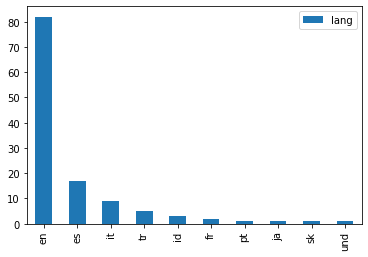

In [113]:
dflenguaje.plot.bar()